# Prepare - Simply Put

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import acquire

df = acquire.get_titanic_data()

## Summarize

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
passenger_id    891 non-null int64
survived        891 non-null int64
pclass          891 non-null int64
sex             891 non-null object
age             714 non-null float64
sibsp           891 non-null int64
parch           891 non-null int64
fare            891 non-null float64
embarked        889 non-null object
class           891 non-null object
deck            203 non-null object
embark_town     889 non-null object
alone           891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


embark_town,Cherbourg,Queenstown,Southampton
embarked,,,
C,168,0,0
Q,0,77,0
S,0,0,644


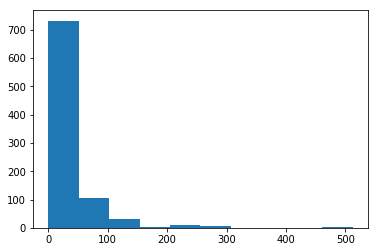

In [9]:
df.info()
df.isnull().sum()
df.isnull().sum()/len(df)*100
df.head()
df.describe()
df.embark_town.value_counts()
plt.hist(df.fare)
pd.crosstab(df.embarked, df.embark_town)


## Clean

In [10]:
# df.drop(columns=['embarked', 'class', 'passsenger_id', 'cabin'])
# df.rename()
# pd.drop_duplicates()
df[~df.embark_town.isnull()]
df[df.embark_town.notnull()]

# pd.factorize()
pd.get_dummies(df[['sex', 'embark_town']], drop_first=True)
# df.embark_town.fillna(value='S')
# df.fillna(0)

,sex_male,embark_town_Queenstown,embark_town_Southampton
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
...,...,...,...
886,1,0,1
887,0,0,1
888,0,0,1
889,1,0,0


## Train Validate Test

In [11]:
from sklearn.model_selection import train_test_split


In [12]:
train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123,
                                        stratify=df.survived
                                       )
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123,
                                   stratify=train_validate.survived
                                  )

